In [32]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

## Dataset: VHM Historical Data

In [33]:

df = pd.read_csv('./Datasets/1 - VHM Historical Data.csv',
                 index_col='Date',
                 parse_dates=True)
df = df.iloc[::-1]
print(df.head())

            Price    Open    High     Low     Vol. Change %
Date                                                       
2019-03-01  68421  66,541  68,722  65,789    1.05M    4.00%
2019-03-04  70075  69,173  70,300  67,368    1.18M    2.42%
2019-03-05  68421  69,323  69,849  68,045    1.50M   -2.36%
2019-03-06  69022  68,421  69,097  68,270  770.13K    0.88%
2019-03-07  69173  69,173  71,654  69,097    1.70M    0.22%


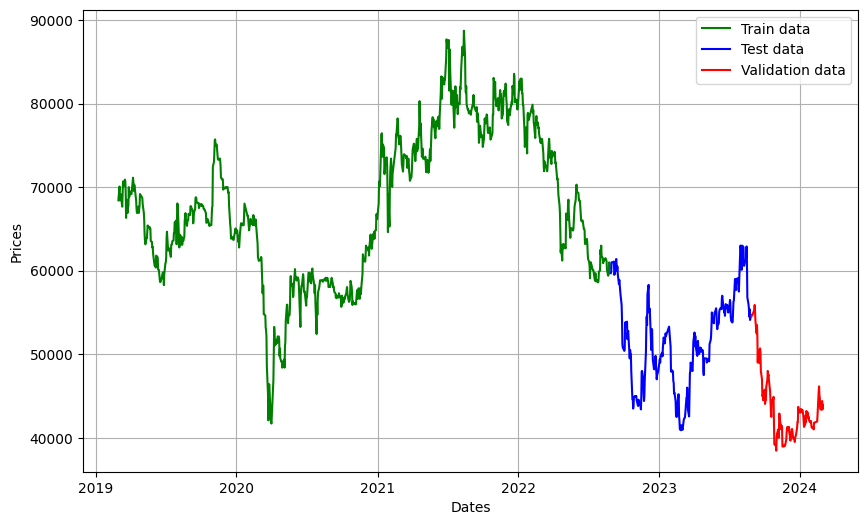

In [34]:
train_size = round(len(df) * 0.7)
test_size = round(len(df) * 0.2)
val_size = round(len(df) * 0.1) + 1

train_data = df[:train_size]
test_data = df[train_size:train_size + test_size]
val_data = df[train_size + test_size:]

len(df), train_size, test_size, val_size, train_data.shape, test_data.shape, val_data.shape

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.plot(val_data['Price'],'red', label='Validation data')
plt.legend()

c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\minhc\AppData\Local\Temp\ipykernel_12912\1267019934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred
C:\Users\minhc\AppData\Local\Temp\ipykernel_12912\1267019934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['Price Predicted'] = val_pred


<Axes: title={'center': 'HotWinters VHM Stock Time Series Forecast'}, xlabel='Date'>

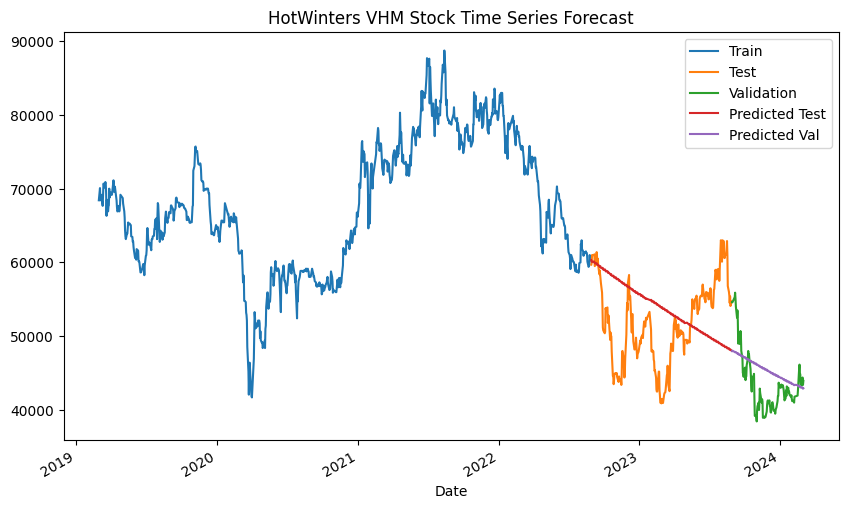

In [35]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

predictions = model.forecast(test_size + val_size)
test_pred = predictions[:test_size]
val_pred = predictions[test_size:test_size + val_size]

test_data['Price Predicted'] = test_pred
val_data['Price Predicted'] = val_pred

plt.title('HotWinters VHM Stock Time Series Forecast')
train_data['Price'].plot(legend=True, label='Train', figsize=(10,6))
test_data['Price'].plot(legend=True, label='Test')
val_data['Price'].plot(legend=True, label='Validation')
test_data['Price Predicted'].plot(legend=True, label='Predicted Test')
val_data['Price Predicted'].plot(legend=True, label='Predicted Val')


## Dataset: NVL Historical Data

In [36]:

df = pd.read_csv('./Datasets/2 - NVL Historical Data.csv',
                 index_col='Date',
                 parse_dates=True)
df = df.iloc[::-1]
print(df.head())

            Price    Open    High     Low     Vol. Change %
Date                                                       
2019-03-01  32933  31,765  32,933  31,765  891.22K    2.95%
2019-03-04  33100  32,933  33,378  32,600  899.13K    0.51%
2019-03-05  32711  32,989  33,211  32,544  963.79K   -1.18%
2019-03-06  31709  32,711  32,711  31,487    1.58M   -3.06%
2019-03-07  31932  31,709  32,210  31,709  849.59K    0.70%


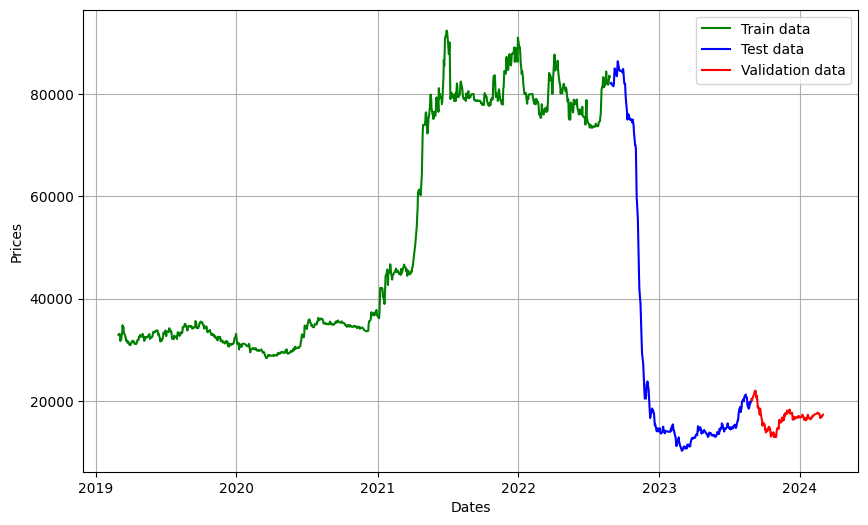

In [37]:
train_size = round(len(df) * 0.7)
test_size = round(len(df) * 0.2)
val_size = round(len(df) * 0.1) + 1

train_data = df[:train_size]
test_data = df[train_size:train_size + test_size]
val_data = df[train_size + test_size:]

len(df), train_size, test_size, val_size, train_data.shape, test_data.shape, val_data.shape

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.plot(val_data['Price'],'red', label='Validation data')
plt.legend()



c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\minhc\AppData\Local\Temp\ipykernel_12912\4035809694.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred
C:\Users\minhc\AppData\Local\Temp\ipykernel_12912\4035809694.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['Price Predicted'] = val_pred


<Axes: title={'center': 'HotWinters NVL Stock Time Series Forecast'}, xlabel='Date'>

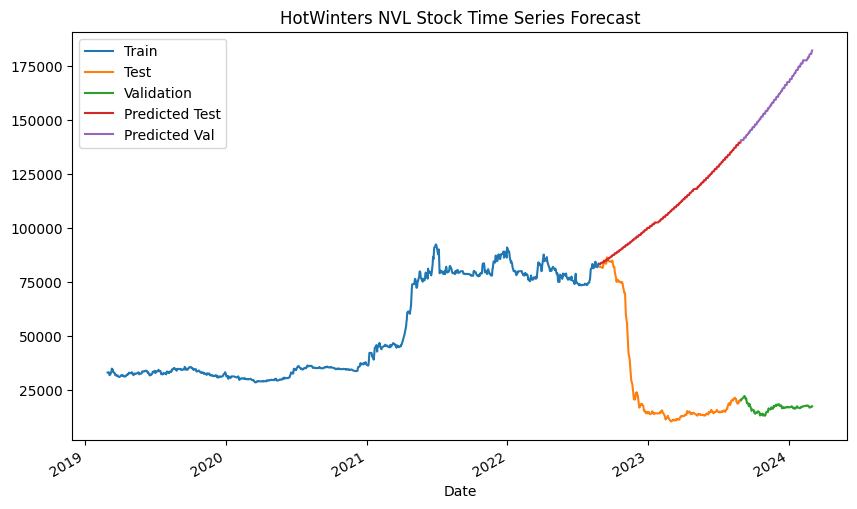

In [38]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

predictions = model.forecast(test_size + val_size)
test_pred = predictions[:test_size]
val_pred = predictions[test_size:test_size + val_size]

test_data['Price Predicted'] = test_pred
val_data['Price Predicted'] = val_pred

plt.title('HotWinters NVL Stock Time Series Forecast')
train_data['Price'].plot(legend=True, label='Train', figsize=(10,6))
test_data['Price'].plot(legend=True, label='Test')
val_data['Price'].plot(legend=True, label='Validation')
test_data['Price Predicted'].plot(legend=True, label='Predicted Test')
val_data['Price Predicted'].plot(legend=True, label='Predicted Val')


## Dataset: NLG Historical Data

In [39]:
df = pd.read_csv('./Datasets/3 - NLG Historical Data.csv',
                 index_col='Date',
                 parse_dates=True)
df = df.iloc[::-1]
print(df.head())

            Price       Open       High        Low     Vol. Change %
Date                                                                
2019-03-01  18707  18,496.60  18,776.90  18,496.60  365.80K    1.14%
2019-03-04  19127  18,706.80  19,127.20  18,636.70    1.08M    2.25%
2019-03-05  18917  19,127.20  19,127.20  18,846.90  468.76K   -1.10%
2019-03-06  18847  18,987.10  19,057.10  18,811.90  225.18K   -0.37%
2019-03-07  18707  18,846.90  18,987.10  18,671.80  453.92K   -0.74%


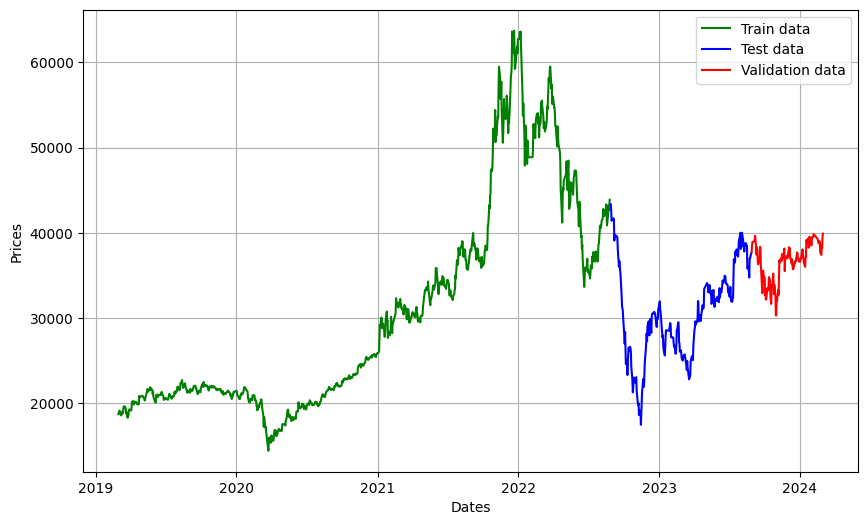

In [40]:
train_size = round(len(df) * 0.7)
test_size = round(len(df) * 0.2)
val_size = round(len(df) * 0.1) + 1

train_data = df[:train_size]
test_data = df[train_size:train_size + test_size]
val_data = df[train_size + test_size:]

len(df), train_size, test_size, val_size, train_data.shape, test_data.shape, val_data.shape

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.plot(val_data['Price'],'red', label='Validation data')
plt.legend()

c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\minhc\AppData\Local\Temp\ipykernel_12912\1741109414.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred
C:\Users\minhc\AppData\Local\Temp\ipykernel_12912\1741109414.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['Price Predicted'] = val_pred


<Axes: title={'center': 'HotWinters NLG Stock Time Series Forecast'}, xlabel='Date'>

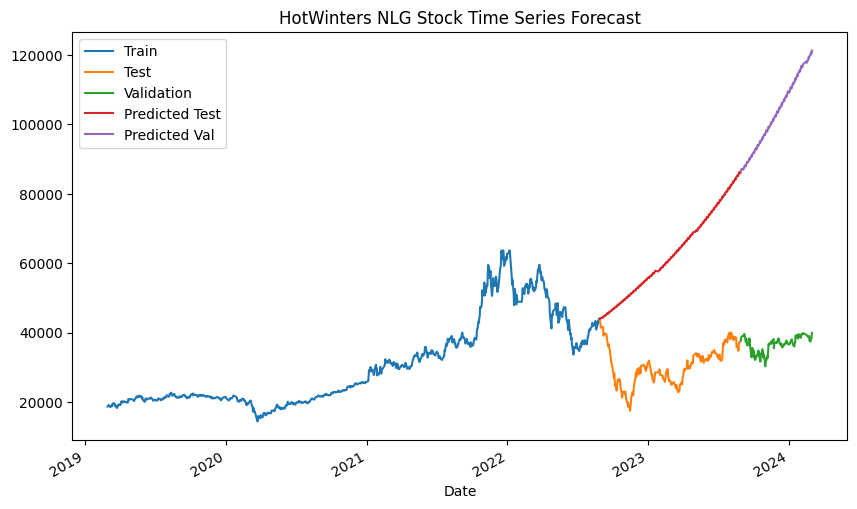

In [41]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

predictions = model.forecast(test_size + val_size)
test_pred = predictions[:test_size]
val_pred = predictions[test_size:test_size + val_size]

test_data['Price Predicted'] = test_pred
val_data['Price Predicted'] = val_pred

plt.title('HotWinters NLG Stock Time Series Forecast')
train_data['Price'].plot(legend=True, label='Train', figsize=(10,6))
test_data['Price'].plot(legend=True, label='Test')
val_data['Price'].plot(legend=True, label='Validation')
test_data['Price Predicted'].plot(legend=True, label='Predicted Test')
val_data['Price Predicted'].plot(legend=True, label='Predicted Val')
